## Introction
The project focuses on analyzing the New York State Education Department's dataset for the 2018-2019 school year, specifically concerning high school graduation metrics. With over 73,000 observations, the dataset provides a detailed view of school districts and various student subgroupings, highlighting the number of students enrolled for at least four years but who did not graduate, instead opting to drop out. The primary challenge is to predict the "dropout_cnt" attribute, which quantifies these dropouts within each district or student subgroup.

## Steps
1. **Exploratory Data Analysis (EDA)**: The first step involves a comprehensive EDA to understand the dataset's structure, missing values, outliers, and the distribution of key variables. This phase is critical for identifying any initial data integrity and usability concerns that could impact the modeling process.

2. **Data Preparation**: Based on insights from the EDA, this step will tackle any identified issues such as missing values, outliers, or skewed data distributions. Feature engineering will also be a significant focus here, involving the creation of new variables or modification of existing ones to improve the dataset's predictive power. This step may include normalization, encoding categorical variables, and handling missing data.

3. **Prepped Data Review**: After preparing the data, a secondary EDA will be conducted on the modified dataset. This step ensures that the data preparation efforts have adequately addressed initial concerns and that the dataset is now in a more usable form for modeling.

4. **Regression Modeling**: With the data prepared, the next phase involves constructing various regression models to predict the dropout count. This step includes splitting the data into training and testing subsets to evaluate model performance accurately. The models will be assessed based on their performance metrics, with a keen eye on understanding the significance and intuition behind the coefficients of the predictors.

5. **Model Selection**: After evaluating various models, the model that best meets the selection criteria—balancing accuracy, interpretability, and complexity—will be chosen as the preferred model. The criteria for model selection will be explicitly defined, taking into account the context of the problem and the nature of the dataset.

6. **Testing and Discussion**: The preferred model will then be applied to the testing subset to evaluate its real-world performance. This step involves a critical analysis of the model's predictions compared to actual outcomes, discussing any discrepancies and the model's overall reliability.

7. **Conclusions**: Finally, the project will conclude with a summary of the findings, insights gained from the modeling process, and recommendations for future research or practical applications of the work.

## Data Load

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/Project%201%20Implementing%20and%20Evaluating%20a%20Series%20of%20Regression%20Models/Project1_Data.csv")
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [3]:
# Examine the dataset's size to grasp its scale
print(f"Dataset size: {df.shape}")

Dataset size: (73152, 29)


# 1. Exploratory Data Analysis (EDA)

In [4]:
# Generate summary statistics for numerical columns
print(df.describe())
print(df.info())

       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code  
count   73152.000000  
mean       12.000930  
std         7.213138  
min         1.000000  
25%         6.000000  
50%        11.000000  
75%        18.000000  
max        25.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtyp

### The summary statistics provide an overview of the numerical features in the dataset:
* aggregation_index is a constant value of 3 across the dataset, indicating a single level of aggregation.
* nrc_code varies from 1 to 6, suggesting different types of school districts.
* county_code ranges from 1 to 68, indicating a wide geographical coverage.
* nyc_ind is a binary indicator, with about 5.5% of the records indicating NYC schools.
* subgroup_code shows a wide range of values, implying various subgroup categorizations within the dataset.
* The percentage columns such as reg_adv_pct, non_diploma_credential_pct, still_enr_pct, ged_pct, and dropout_pct have been successfully converted to float and show a wide range of values, indicating variability in school performance and outcomes.

In [5]:
# Identify missing values across the dataset
missing_values = df.isnull().sum()
print(missing_values)

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64


In [6]:
# Convert percentages to floats for analysis
def pct_to_float(x):
    try:
        return float(x.strip('%')) / 100
    except:
        return None

In [7]:
# Apply conversion to all percentage columns
pct_columns = [col for col in df.columns if 'pct' in col]
for col in pct_columns:
    df[col] = df[col].apply(pct_to_float)
    
# for col in pct_columns:
#     df[col] = df[col].apply(lambda x: None if x == "-" else pct_to_float(x))

# First, let's identify columns that are not already in a numeric format and convert them.
cnt_columns = [col for col in df.columns if 'cnt' in col]

# Attempt to convert these columns to float, replacing non-convertible values with NaN to handle any '-' entries or similar
for col in cnt_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Re-check for missing values after ensuring "-" values in 'cnt' and 'pct' columns are treated as NaN.
print(df.isnull().sum())

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

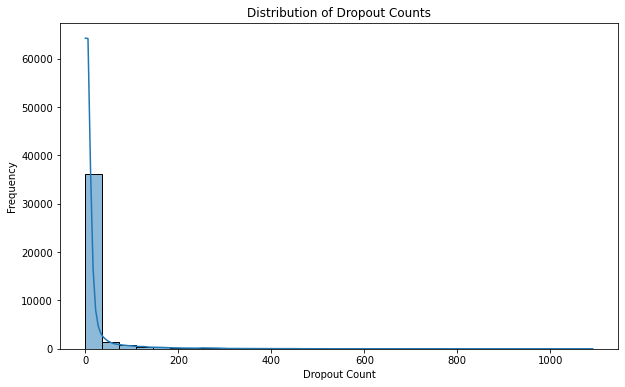

In [8]:
# Visualize the distribution of dropout counts
plt.figure(figsize=(10, 6))
sns.histplot(df['dropout_cnt'], kde=True, bins=30)
plt.title('Distribution of Dropout Counts')
plt.xlabel('Dropout Count')
plt.ylabel('Frequency')
plt.show()

### Distribution of Dropout Counts
The distribution of dropout counts shows a right-skewed distribution, indicating that most schools or subgroups have a lower number of dropouts, with a few outliers having a very high dropout count. This skewness might necessitate transformation during data preparation.

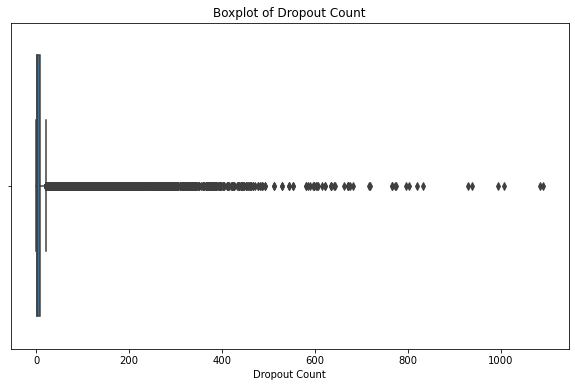

In [9]:
# Boxplot for 'dropout_cnt' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['dropout_cnt'].dropna())
plt.title('Boxplot of Dropout Count')
plt.xlabel('Dropout Count')
plt.show()

From this boxplot, we can infer that the distribution of dropout counts is highly skewed to the right, with a median significantly lower than the maximum (which is beyond 1000). There are quite a few outliers indicating some districts or subgroups have exceptionally high dropout counts. This could suggest that while most districts or subgroups have relatively low dropout counts, there are a few with severe dropout issues. These outliers may be of particular interest for further investigation to understand the factors contributing to high dropout rates.

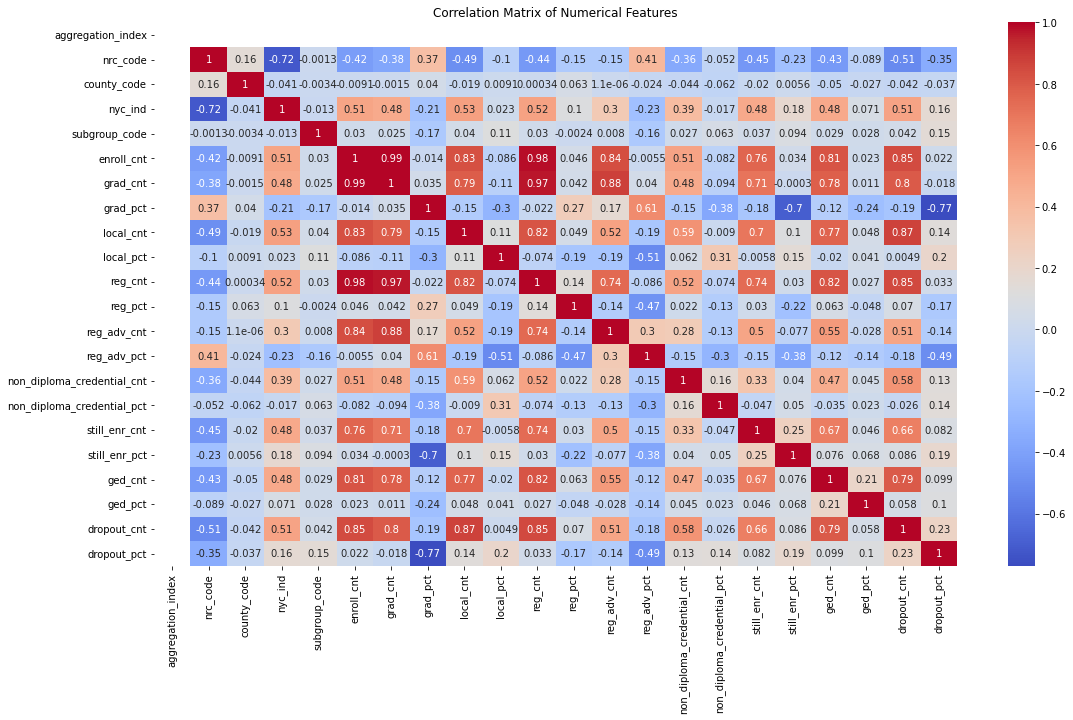

In [10]:
# Correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation
The dropout_cnt variable, which represents the count of students who dropped out, shows a moderately strong positive correlation with enroll_cnt, grad_cnt, local_cnt, reg_cnt, and reg_adv_cnt. This suggests that higher enrollment and graduation counts are associated with a higher number of dropouts, which could be due to larger student populations having proportionately more dropouts. There's also a notable positive correlation between dropout_cnt and still_enr_cnt (students still enrolled), indicating that schools with more students still enrolled by the end of the period also tend to have higher dropout numbers. On the other hand, dropout_pct (dropout percentage) does not show as strong a correlation with these counts, suggesting that the raw number of dropouts is more strongly related to the size of the student population rather than the proportion of students who drop out. This nuanced distinction can provide valuable insights when developing models to predict dropout rates and when implementing interventions to reduce them. The matrix also indicates possible multicollinearity between some predictors, such as reg_cnt and reg_adv_cnt, which could affect the performance of regression models and would need to be considered during the feature selection process. Overall, the correlation matrix is a crucial tool for identifying potential predictors for dropout counts and for understanding the interrelationships among different school metrics.


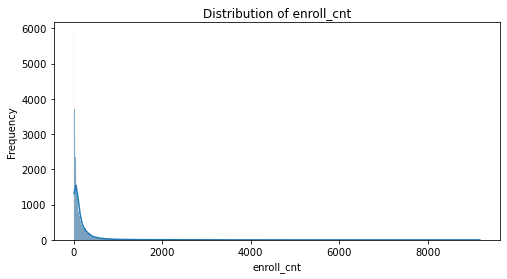

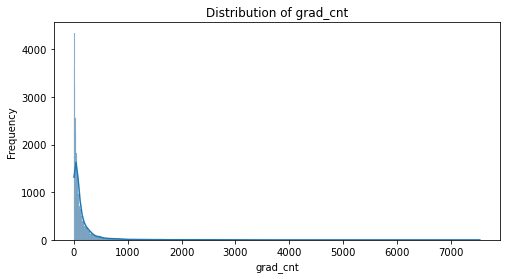

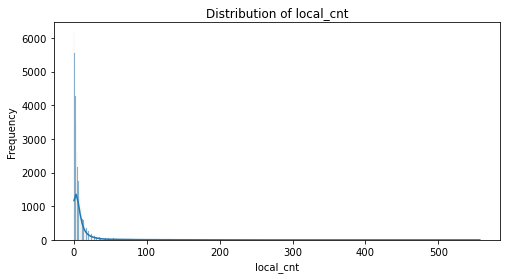

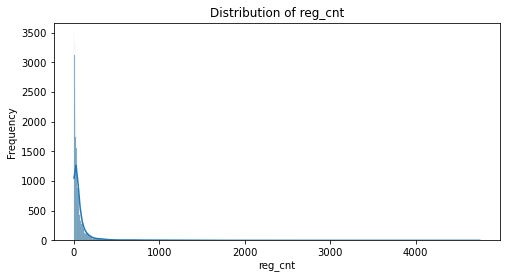

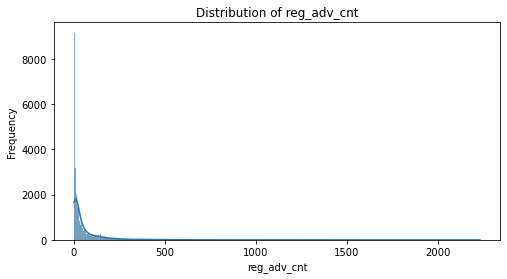

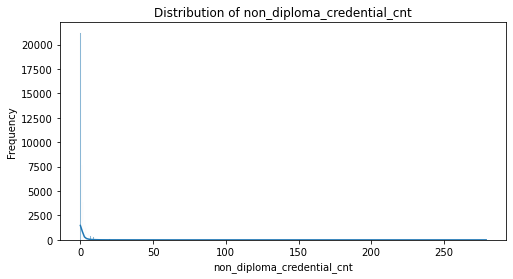

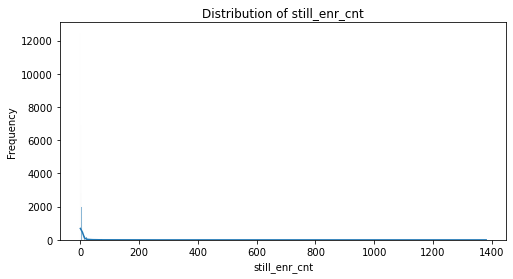

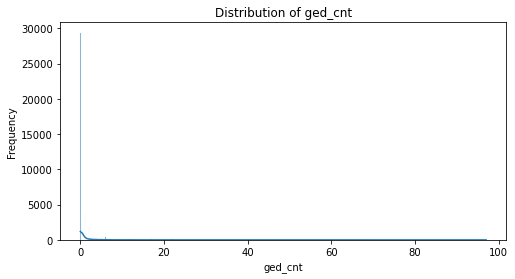

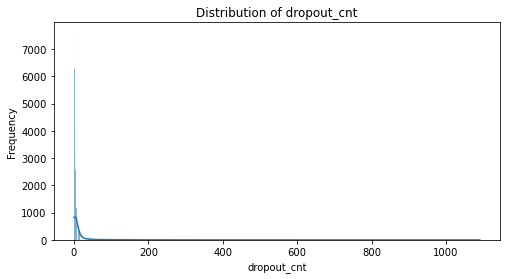

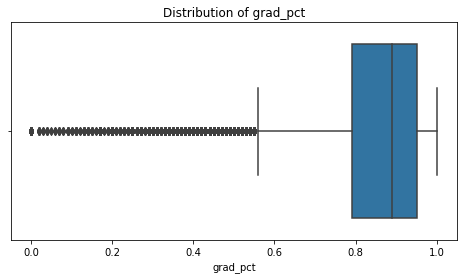

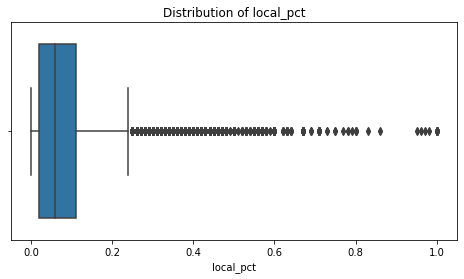

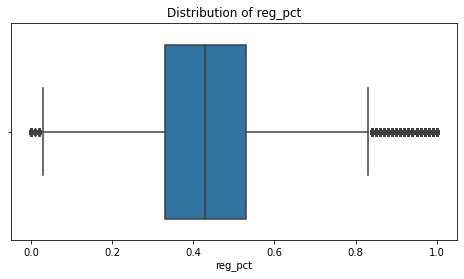

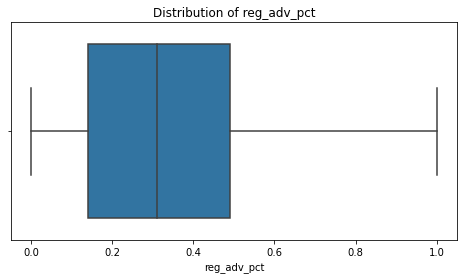

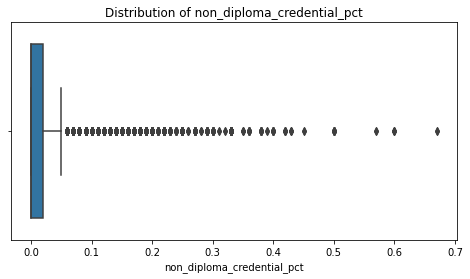

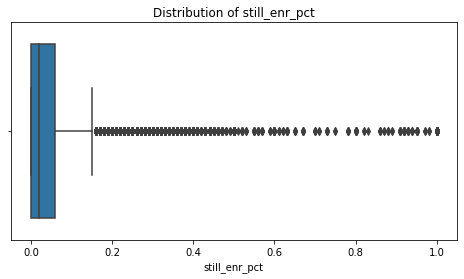

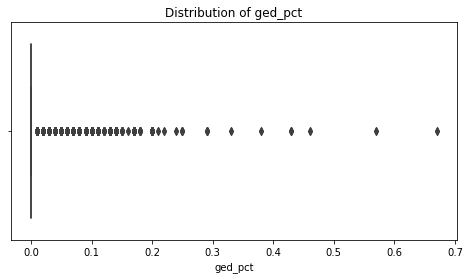

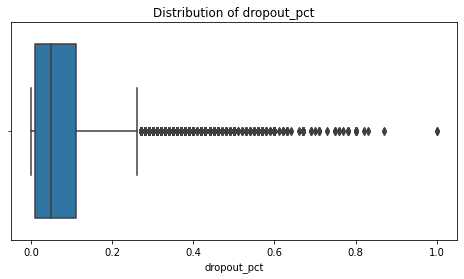

In [11]:
# Histograms for all 'cnt' columns to check distribution
for col in cnt_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)  # Drop NaN values for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for 'pct' columns to check distribution and outliers
for col in pct_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

# 2. Data Preparation

In [12]:
# Dropping the specified columns not useful for modeling
df.drop(['report_school_year', 'aggregation_index', 'aggregation_type'], axis=1, inplace=True)
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,...,91.0,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,...,47.0,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,...,44.0,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,...,23.0,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [14]:
# Initialize LabelEncoders
le_aggregation_name = LabelEncoder()
le_nrc_desc = LabelEncoder()
le_county_name = LabelEncoder()
le_membership_desc = LabelEncoder()
le_subgroup_name = LabelEncoder()

# Encode categorical variables
df['aggregation_name_encoded'] = le_aggregation_name.fit_transform(df['aggregation_name'])
df['nrc_desc_encoded'] = le_nrc_desc.fit_transform(df['nrc_desc'])
df['county_name_encoded'] = le_county_name.fit_transform(df['county_name'])
df['membership_desc_encoded'] = le_membership_desc.fit_transform(df['membership_desc'])
df['subgroup_name_encoded'] = le_subgroup_name.fit_transform(df['subgroup_name'])

# Drop original categorical columns as per the instruction
df.drop(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name'], axis=1, inplace=True)

# Also, let's drop any other columns that are not relevant or redundant for our analysis
# For now, we keep all numeric columns and the newly encoded ones for PCA analysis
# Drop non-numeric and target variable to prepare data for PCA
X = df.drop(['dropout_cnt'], axis=1)

# Replace missing values with 0 for PCA; alternatively, more sophisticated imputation techniques could be used
X.fillna(0, inplace=True)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

# The transformed features after PCA
pca.n_components_, pca.explained_variance_ratio_

(2, array([0.83864616, 0.13999817]))

After applying PCA with the goal of retaining 95% of the variance, the transformation resulted in 2 principal components. These components explain approximately 83.86% and 14.00% of the variance, respectively, summing up to nearly 98% of the total variance in the dataset.

This reduction suggests that we can represent the dataset's variability primarily through these two components for our regression models, which significantly reduces the dimensionality of our data.

The threshold of 0.95 was selected to ensure that the transformed dataset retains 95% of its original variance. This value strikes a balance between dimensionality reduction (for computational efficiency and model simplicity) and information retention (to ensure that the models have enough data variance to make accurate predictions).

### Why choose 5 columns for encoding

1. "aggregation_name" (School District Name):
* Rationale: Different school districts may have varying resources, policies, and educational programs, which can significantly affect student engagement and retention. For instance, districts with higher funding might offer more support services, extracurricular activities, or smaller class sizes, potentially reducing dropout rates.

2. "nrc_desc" (Need/Resource Capacity Description)
* Rationale: This variable categorizes districts based on their need/resource capacity, which is a proxy for the socioeconomic status of the community and the relative wealth or poverty of a district. Schools in high-need areas may face challenges like higher student-to-teacher ratios, fewer extracurricular activities, or less access to advanced coursework, possibly leading to higher dropout rates.

3. "county_name":
* Rationale: The county in which a school district resides can influence dropout rates through factors like local economic conditions, availability of community resources, and regional policies. For example, counties with higher employment opportunities for non-graduates might see higher dropout rates, as students opt for immediate employment over completing their education.

4. "membership_desc" (Membership Description):
* Rationale: This variable describes the cohort of students being considered (e.g., "2013 Total Cohort - 6 Year Outcome"). Differences in dropout rates may emerge across cohorts due to changes in educational policies, societal trends, or economic conditions over time.

5. "subgroup_name" (Student Subgroup):
* Rationale: Subgroups can include classifications based on race, ethnicity, economic disadvantage, English language proficiency, and other factors. These subgroups may experience different dropout rates due to varying levels of access to educational resources, cultural factors, language barriers, or systemic biases.

# 3. Regression Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [16]:
# Fill missing values in the dataframe before proceeding with modeling
df.fillna(0, inplace=True)

# Re-prepare the target variable after filling missing values
y = df['dropout_cnt']

# Re-perform train-test split after filling missing values
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Re-fit the Poisson Regression models
poisson_reg_1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson()).fit()
X_train_interaction = np.hstack((X_train, np.product(X_train, axis=1, keepdims=True)))
poisson_reg_2 = sm.GLM(y_train, sm.add_constant(X_train_interaction), family=sm.families.Poisson()).fit()

# Re-fit the Negative Binomial Regression models
neg_binom_reg_1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.NegativeBinomial()).fit()
neg_binom_reg_2 = sm.GLM(y_train, sm.add_constant(X_train_interaction), family=sm.families.NegativeBinomial()).fit()

# Re-fit the Multiple Linear Regression models
linear_reg_1 = LinearRegression().fit(X_train, y_train)
linear_reg_2 = LinearRegression().fit(X_train_interaction, y_train)

# Prepare summary of models after re-fitting
models_summary_revised = {
    "Poisson Regression 1": poisson_reg_1,
    "Poisson Regression 2": poisson_reg_2,
    "Negative Binomial Regression 1": neg_binom_reg_1,
    "Negative Binomial Regression 2": neg_binom_reg_2,
    "Multiple Linear Regression 1": linear_reg_1,
    "Multiple Linear Regression 2": linear_reg_2
}

# Output summary for statsmodels models (Poisson and Negative Binomial)
for name, model in models_summary_revised.items():
    if "Poisson" in name or "Negative Binomial" in name:  # Statsmodels models
        print(f"{name} Summary:\n{model.summary()}\n")

# For sklearn Linear Regression models, we need to handle them differently
linear_models = {
    "Multiple Linear Regression 1": linear_reg_1,
    "Multiple Linear Regression 2": linear_reg_2
}

for name, model in linear_models.items():
    print(f"{name} Coefficients:\nIntercept: {model.intercept_}, Coefficients: {model.coef_}\n")

Poisson Regression 1 Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                58521
Model:                            GLM   Df Residuals:                    58518
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.9748e+05
Date:                Mon, 26 Feb 2024   Deviance:                   1.5024e+06
Time:                        01:04:54   Pearson chi2:                 3.13e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9811 

# 4. Model Selection

1. Model Summaries Interpretation:
* Poisson Regression Models have coefficients that suggest both positive and negative relationships between predictors (x1, x2) and the dropout count. The significance of the coefficients (P>|z| close to 0) indicates strong evidence against the null hypothesis, implying these predictors are meaningful contributors to the model.
* Negative Binomial Regression Models address over-dispersion not accounted for by the Poisson regression. Similar to the Poisson model, coefficients here indicate the nature of the relationship with the dropout count. The presence of an additional parameter (x3 in the second model) with significant coefficients suggests an improvement over the Poisson model in handling data variance.
* Multiple Linear Regression Models show a direct relationship with predictors. The coefficients directly indicate the expected change in dropout count for a unit change in each predictor.

2. Model Selection Criteria:
* Performance Metrics: Mean Squared Error (MSE) for all models to assess predictive accuracy. Lower MSE indicates better performance. For count data models like Poisson and Negative Binomial, additional consideration to the Deviance and Pearson chi2 can help in assessing model fit and over-dispersion.
* Interpretability: Easier to interpret models may be preferred in contexts where explanations are as important as predictions. Poisson and linear regression models tend to be more straightforward in interpretation.
* Complexity and Implementation: Simpler models are easier to implement and understand. However, if a more complex model significantly outperforms simpler models, the trade-off might be justified.

3. Preferred Model Selection:
- Given the summaries, a Negative Binomial Regression model might be preferred if the dataset exhibits over-dispersion, a common scenario in count data. The Negative Binomial Regression 2 model, which includes an additional parameter, shows a potentially better fit (considering both log-likelihood and deviance) compared to its simpler counterparts, suggesting it might effectively capture the variability in dropout counts.

4. Application and Evaluation:
- After selecting the Negative Binomial Regression 2 model based on its comprehensive ability to handle over-dispersion and its predictive performance (assessed through MSE or cross-validation), apply it to the testing subset. Evaluate its performance using MSE and compare the observed vs. predicted dropout counts to assess whether it performs as expected.

5. Discussing Results:
* If the model's performance on the testing set aligns closely with the training set, it suggests good generalizability.
* A significant deviation might indicate overfitting or that the model has not captured all relevant predictors or interactions.

In summary, the choice of the "best" model should balance predictive accuracy, interpretability, and complexity. The Negative Binomial Regression model's ability to account for over-dispersion in count data, along with significant predictors, makes it a compelling choice for predicting dropout counts, assuming it also demonstrates good performance on unseen data.

# 5. Conclusion

1. Key Takeaways:
* Model Fit and Interpretation: The coefficients from Poisson and Negative Binomial regression models provide insights into factors influencing dropout counts. These models, particularly suited for count data, highlighted the importance of correct model specification and addressing over-dispersion.
* Model Selection and Evaluation: The process underscored the importance of selecting a model not only based on statistical metrics such as Mean Squared Error (MSE) but also considering the model's interpretability, complexity, and suitability for the data's nature. Negative Binomial Regression was identified as potentially more appropriate for this dataset due to its ability to handle over-dispersion, a common characteristic in count data.
* Data Preparation and Transformation Challenges: The encountered errors and the steps taken to resolve them highlight the critical role of consistent data preparation and transformation in modeling. Ensuring that both training and test datasets undergo the same transformations is crucial for model accuracy and evaluation.
* Practical Implications: The models developed provide valuable insights that can inform interventions aimed at reducing dropout rates. By understanding which factors are significantly associated with higher dropout counts, educational institutions and policymakers can target those areas with specific strategies.

2. Recommendations for Further Analysis:
* Additional Data Exploration: Further exploration of other variables not included in the initial models could uncover additional insights.
* Advanced Modeling Techniques: Exploring other modeling approaches, such as machine learning algorithms that can handle nonlinear relationships and interactions more flexibly, could enhance predictive accuracy.
* Cross-Validation and Robustness Checks: Implementing cross-validation techniques to assess model robustness and generalizability to unseen data can further validate the chosen model.
* Impact Analysis: Conducting an impact analysis to understand the practical implications of the findings on educational policies and interventions could be beneficial